# Práctica I: Python
## Ana Fernández Cruz y Jesús Gallego Olivas

## Práctica 1: Python para la ciencia de datos – Análisis del fichero mundo

El objetivo de esta práctica es utilizar los conocimientos adquiridos en la asignatura para realizar un análisis de distintas características de la población mundial basándonos en el fichero mundo.csv. La práctica se realizará en grupos de 2 personas y corresponde a un 50% de la nota de la asignatura. La fecha límite de entrega será el 23/11/2019 a las 23:59. Se permite la entrega hasta una semana después (30/11/2019), pero las prácticas que se entreguen en fechas posteriores al 23/11 tendrán como máximo una puntuación de 8 puntos. La entrega consistirá en un notebook de Python en el que se incluyan las respuestas a las preguntas planteadas, así como el código desarrollado para responderlas.

El fichero consta de una tabla con 26 columnas y 110 filas que contienen datos referentes a varias características de la población mundial. Se pide al alumno que, una vez leídos los datos, realice las siguientes operaciones con ellos:

1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

    - Número de muestras (valores distintos de missing)
    - Media y desviación estándar
    - Valor mínimo y valor máximo

In [95]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 999)

In [96]:
#Cargamos y mostramos el csv
df = pd.read_csv("mundo.csv")
df

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Uruguay,3200,18.0,89.0,Católica,77,71,96.0,0.80,17.0,3131,6,2653.0,469.0,17.0,10.0,14.656250,3.495683,1.710821,1.700000,2.44,3.505150,97.0,96.0,8.0,6.0
105,Uzbekistán,22600,50.0,41.0,Musulma.,72,65,97.0,2.13,53.0,1350,5,NaN,2.0,30.0,7.0,0.009050,3.130334,0.390236,4.285714,3.73,4.354108,100.0,100.0,2.0,5.0
106,Venezuela,20600,22.0,91.0,Católica,76,70,88.0,2.16,28.0,2829,6,2582.0,3511.0,26.0,5.0,16.483568,3.451633,1.751500,5.200000,3.05,4.313867,90.0,87.0,5.0,6.0
107,Vietnam,73100,218.0,20.0,Budista,68,63,88.0,1.78,46.0,230,3,2233.0,107.0,27.0,8.0,0.146375,2.361728,0.680916,3.375000,3.33,4.863917,93.0,83.0,5.0,3.0


A primera vista podemos ver algunos valores faltantes, pero con la siguiente linea de codigo nos da un resumen de las variables que poseen datos faltantes.

In [97]:
df.isnull().any() #Detectamos que variables tienen datos faltantes

pa_s        False
poblac      False
densidad    False
urbana       True
relig        True
espvidaf    False
espvidam    False
alfabet      True
inc_pob     False
mortinf     False
pib_cap     False
regi_n      False
calor_as     True
sida         True
tasa_nat    False
tasa_mor     True
tasasida     True
log_pib     False
logtsida     True
nac_def      True
fertilid     True
log_pob     False
alfabmas     True
alfabfem     True
clima        True
region2      True
dtype: bool

Podemos ver que hay varias variables relevantes con datos faltantes, la mayoria son de tipo numérico excepto la variables 'relig' y 'clima' que son de tipo categórico.

Para las variables de tipo numérico se ha optado por rellenar los datos faltantes con sus respectivas medias. La forma más correcta de hacer este imputación de datos, seria la de analizar cada registro, cada país en este caso, y ver que variables son las faltantes y cuales son los datos de los países mas parecidos al que estamos inputando y añadirles ese valor o uno muy parecido.

Para la variables de tipo categórico, al representar la religión se podría hacer un estudio y buscar la religión correcta para el país determinado.Se puede dar que un país no tenga una religión predominante o oficial por lo que se ha creado una nueva categória llamada 'Sin determinar'. Para la variable 'clima' utilizamos el mismo razonamiento y le asignamos el valor 9 a los climas sin determinar.

In [98]:
df["clima"].fillna(9, inplace = True) #Rellenamos los datos faltantes 
df = df.fillna(df.mean()) #Rellenamos los datos faltantes con la media de cada variable
df["relig"].fillna("Sin determinar", inplace = True) #Rellenamos los datos faltantes 
#para esta variable con la nueva categória.

In [99]:
#Definimos una función que nos ayude a calcular los datos que buscamos. Hay que tener en cuenta las variables
#que son string. 
def getStats(df, col):
    not_null = df[str(col)].notnull().sum()
    obj = [col,not_null,None ,None ,None ,None]
    if(len(df[col]) != 0 and is_numeric_dtype(df[col])):
        obj = [col,not_null, round(df[col].mean(),3), round(df[col].std(),3), min(df[col]), max(df[col])]
    return obj

#Definimos una función generateTableStats que unificará los resultados de cada variable.
def generateTableStats(df):
    datas = []
    for col in df.columns:
        data = getStats(df, col)
        if(data != None):
            datas.append(data)
    return pd.DataFrame(datas, columns = ['Name','Not Missing', 'Mean', 'Std', 'Min', 'Max'])    

stats = generateTableStats(df)
stats

,Name,Not Missing,Mean,Std,Min,Max
0,pa_s,109,NaN,NaN,NaN,NaN
1,poblac,109,47723.881,146726.364,256.000000,1.205200e+06
2,densidad,109,203.415,675.705,2.300000,5.494000e+03
3,urbana,109,56.528,24.091,5.000000,1.000000e+02
4,relig,109,NaN,NaN,NaN,NaN
5,espvidaf,109,70.156,10.572,43.000000,8.200000e+01
6,espvidam,109,64.917,9.273,41.000000,7.600000e+01
7,alfabet,109,78.336,22.670,18.000000,1.000000e+02
8,inc_pob,109,1.682,1.198,-0.300000,5.240000e+00
9,mortinf,109,42.313,38.079,4.000000,1.680000e+02


Podemos observar que las variables 'pa_s' y 'relig' no tiene resultados en Mean, Std, Min y Max. Esto es debido aque son variables del tipo categoricas, no son numericas. Por lo tanto no pueden tener estos valores.

2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
       - Por región (columna región)
       - Por religión
   Calcula los siguientes estadísticos:
       - Número de observaciones
       - Número de valores ausentes (missing)
       - Mediana
       - Media
       - Varianza
       - Valores máximo y mínimo 
   Para las siguientes variables:
       - Incremento de la población
       - Esperanza de vida
       - Tasa de alfabetización (tanto masculina como femenina)
       - La mortalidad infantil
       - PIB per cápita
   ¿Qué conclusiones podemos sacar de estos cálculos? Comenta los resultados.

In [100]:
aggregation = {'Total': lambda x: x.notnull().sum() + x.isnull().sum(), 
                'Missing': lambda x: x.isnull().sum(),
                'Median': lambda x: round(x.median(), 3),
                'Mean': lambda x: round(x.mean(), 3), 
                'Std': lambda x: round(x.std(), 3), 
                'Min': min, 
                'Max':max}
aggregations = { 'inc_pob': aggregation, 'espvidaf': aggregation, 'espvidam': aggregation, 
                'alfabmas': aggregation, 'alfabfem': aggregation, 'mortinf': aggregation, 
                'pib_cap': aggregation }

In [101]:
#Agrupamos por religión
groupRelig = df.groupby('relig')
groupReligStats = groupRelig.agg(aggregations)

#Agrupamos por region.
groupRegion = df.groupby('regi_n')
groupRegionStats = groupRegion.agg(aggregations)

#Mostramos las primeras columnas de la agregación o agrupación por religión
groupReligStats

inc_pob                                          espvidaf  \
                 Total Missing Median   Mean    Std   Min   Max    Total   
relig                                                                      
Animista           4.0     0.0  2.855  2.877  0.330  2.50  3.30        4   
Budista            7.0     0.0  1.400  1.291  1.013 -0.09  2.90        7   
Católica          41.0     0.0  1.630  1.403  0.984 -0.30  3.07       41   
Indú               1.0     0.0  1.900  1.900    NaN  1.90  1.90        1   
Judía              1.0     0.0  2.220  2.220    NaN  2.22  2.22        1   
Musulma.          27.0     0.0  3.100  2.844  0.988  0.70  5.24       27   
Ortodoxa           8.0     0.0  0.260  0.434  0.533 -0.20  1.40        8   
Protest.          16.0     0.0  0.520  0.834  0.781  0.10  2.80       16   
Sin determinar     1.0     0.0  2.600  2.600    NaN  2.60  2.60        1   
Taoista            2.0     0.0  1.150  1.150  0.071  1.10  1.20        2   
Tribal             1.0     0.0  2.700  2.700    NaN  2.70  2.70        1   

                                                      espvidam                 \
               Missing Median    Mean     Std Min Max    Total Missing Median   
relig                                                                           
Animista             0   53.5  52.500   6.137  45  58        4       0   50.5   
Budista              0   73.0  72.143  10.140  52  82        7       0   67.0   
Católica             0   76.0  71.585  10.443  43  82       41       0   69.0   
Indú                 0   59.0  59.000     NaN  59  59        1       0   58.0   
Judía                0   80.0  80.000     NaN  80  80        1       0   76.0   
Musulma.             0   68.0  65.852   8.982  44  78       27       0   65.0   
Ortodoxa             0   75.0  75.750   1.832  74  80        8       0   68.5   
Protest.             0   79.0  74.500  11.900  44  81       16       0   73.0   
Sin determinar       0   68.0  68.000     NaN  68  68        1       0   62.0   
Taoista              0   74.0  74.000   7.071  69  79        2       0   70.0   
Tribal               0   66.0  66.000     NaN  66  66        1       0   60.0   

                                       alfabmas                           \
                  Mean     Std Min Max    Total Missing   Median    Mean   
relig                                                                      
Animista        49.250   6.551  41  55      4.0     0.0   56.000  51.500   
Budista         66.857   8.934  50  76      7.0     0.0   90.000  83.351   
Católica        65.683   9.535  41  76     41.0     0.0   85.000  83.136   
Indú            58.000     NaN  58  58      1.0     0.0   64.000  64.000   
Judía           76.000     NaN  76  76      1.0     0.0   95.000  95.000   
Musulma.        62.333   7.646  45  73     27.0     0.0   70.000  68.128   
Ortodoxa        68.125   3.399  64  75      8.0     0.0  100.000  94.432   
Protest.        68.375  10.589  41  76     16.0     0.0   78.729  83.677   
Sin determinar  62.000     NaN  62  62      1.0     0.0   78.729  78.729   
Taoista         70.000   4.243  67  73      2.0     0.0   90.000  90.000   
Tribal          60.000     NaN  60  60      1.0     0.0   32.000  32.000   

                                              alfabfem                   \
                   Std        Min         Max    Total Missing   Median   
relig                                                                     
Animista        17.078  28.000000   66.000000      4.0     0.0   30.000   
Budista         17.486  48.000000   99.000000      7.0     0.0   67.259   
Católica        11.897  57.000000   99.000000     41.0     0.0   79.000   
Indú               NaN  64.000000   64.000000      1.0     0.0   39.000   
Judía              NaN  95.000000   95.000000      1.0     0.0   89.000   
Musulma.        19.231  32.000000  100.000000     27.0     0.0   50.000   
Ortodoxa         9.717  78.729412  100.000000      8.0     0.0  100.000   


Podemos ver claramente que tenemos dos religiones mayoritarias, la 'Católica' y la 'Musulmana'. Y varias que solo se ven presentes en un país, 'Tribal', 'Indú', 'Judía' y 'Sin determinar'.

Si nos encontramos un 'NaN' en los valores para Std nos esta indicando que solo tiene un valor para esa religión o región, ya que no es posible tener una desviación tipica con un solo valor.

In [102]:
#Mostramos las primeras columnas de la agregación o agrupación por región
groupRegionStats

inc_pob                                          espvidaf          \
         Total Missing Median   Mean    Std   Min   Max    Total Missing   
regi_n                                                                     
1         21.0     0.0  0.400  0.511  0.338  0.10  1.38       21       0   
2         14.0     0.0  0.255  0.240  0.323 -0.30  0.80       14       0   
3         17.0     0.0  1.780  1.651  0.857 -0.09  2.90       17       0   
4         19.0     0.0  2.800  2.723  0.456  1.46  3.30       19       0   
5         17.0     0.0  3.200  2.946  1.122  1.40  5.24       17       0   
6         21.0     0.0  2.000  1.877  0.676  0.21  2.73       21       0   

                                      espvidam                                \
       Median    Mean     Std Min Max    Total Missing Median    Mean    Std   
regi_n                                                                         
1          80  80.095   1.179  78  82       21       0   74.0  73.714  1.146   
2          76  76.000   1.109  74  78       14       0   68.5  67.714  2.335   
3          69  67.412  10.886  44  82       17       0   65.0  63.471  8.726   
4          55  54.263   7.978  43  70       19       0   51.0  50.789  7.262   
5          72  71.588   4.501  63  80       17       0   67.0  67.353  3.920   
6          75  71.762   7.389  47  79       21       0   68.0  66.238  7.334   

               alfabmas                                                    \
       Min Max    Total Missing  Median    Mean     Std        Min    Max   
regi_n                                                                      
1       71  76     21.0     0.0  78.729  83.807   8.447  78.729412  100.0   
2       64  72     14.0     0.0  99.000  92.189  10.418  78.729412  100.0   
3       45  76     17.0     0.0  86.000  77.909  19.843  44.000000   99.0   
4       41  66     19.0     0.0  61.000  55.459  17.582  28.000000   81.0   
5       60  76     17.0     0.0  78.000  80.337  13.979  55.000000  100.0   
6       43  76     21.0     0.0  90.000  85.095  12.272  57.000000   99.0   

       alfabfem                                                         \
          Total Missing  Median    Mean     Std        Min         Max   
regi_n                                                                   
1          21.0     0.0  67.259  74.566  12.276  67.258824  100.000000   
2          14.0     0.0  98.000  87.878  15.968  67.258824  100.000000   
3          17.0     0.0  68.000  62.795  28.646  14.000000   99.000000   
4          19.0     0.0  35.000  33.908  17.529   9.000000   67.258824   
5          17.0     0.0  67.000  66.486  20.710  34.000000  100.000000   
6          21.0     0.0  86.000  80.619  15.148  47.000000   99.000000   

       mortinf                                             pib_cap          \
         Total Missing Median    Mean     Std   Min    Max   Total Missing   
regi_n                                                                       
1         21.0     0.0    6.8   6.910   1.172   4.0    9.2      21       0   
2         14.0     0.0   18.0  16.893   5.483   8.7   27.0      14       0   
3         17.0     0.0   46.0  53.882  46.441   4.4  168.0      17       0   
4         19.0     0.0  105.0  94.179  28.653  39.3  137.0      19       0   
5         17.0     0.0   39.5  41.394  19.179   8.6   76.4      17       0   
6         21.0     0.0   35.0  39.114  24.524  10.2  109.0      21       0   

                                                 
       Median       Mean       Std   Min    Max  
regi_n                                           
1       17245  16610.857  3725.971  8060  23474  
2        5368   5159.786  1708.701  2340   7400  
3         867   4263.000  6291.046   202  19860  
4         409    998.684  1178.258   122   4283  
5        3721   4957.412  4057.448   748  14193  
6        1500   1997.667  1482.123   383   6950

3. Selecciona los países cuya tasa de mortalidad sea superior a la media. Comenta los resultados obtenidos.

In [103]:
#Calculamos el valor para la media en la tasa de mortalidad
mean_tasa_mor = df['tasa_mor'].mean()

#Filtramos las filas cuyas tasas de mortalidad sean superiores a la media
mort_great_tasa = df['tasa_mor'] > mean_tasa_mor
dfSort_TasaMor = df[mort_great_tasa].sort_values(by=['tasa_mor'] ,ascending=False)
dfSort_TasaMor

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
103,Uganda,19800,76.0,11.000000,Católica,43,41,48.000000,2.42,112.0,325,4,2153.000000,43875.000000,49.0,24.000000,221.590909,2.511883,2.945170,2.041667,6.770000,4.296665,62.000000,35.000000,5.0,4.0
1,Afganistán,20500,25.0,18.000000,Musulma.,44,45,29.000000,2.80,168.0,205,3,2753.826667,0.000000,53.0,22.000000,0.000000,2.311754,0.000000,2.409091,6.900000,4.311754,44.000000,14.000000,3.0,3.0
19,Burundi,6000,216.0,5.000000,Católica,50,46,50.000000,2.26,105.0,208,4,1932.000000,7225.000000,44.0,21.000000,120.416667,2.318063,2.606978,2.095238,6.800000,3.778151,61.000000,40.000000,8.0,4.0
88,Ruanda,8400,311.0,6.000000,Católica,46,43,50.000000,2.80,117.0,292,4,1971.000000,10706.000000,49.0,21.000000,137.256410,2.465383,2.676126,2.333333,8.190000,3.924279,64.000000,37.000000,8.0,4.0
85,Rep. C. Africana,3300,5.0,47.000000,Protest.,44,41,27.000000,2.40,137.0,457,4,2036.000000,3730.000000,44.0,21.000000,113.030303,2.659916,2.574180,2.100000,5.420000,3.518514,33.000000,15.000000,5.0,4.0
100,Tanzania,29800,29.0,21.000000,Animista,45,41,46.000000,2.50,110.0,263,4,2206.000000,38719.000000,46.0,19.000000,129.929530,2.419956,2.646925,2.421053,6.200000,4.474216,62.000000,31.000000,6.0,4.0
49,Haití,6500,231.0,29.000000,Católica,47,43,53.000000,1.63,109.0,383,6,2013.000000,4987.000000,40.0,19.000000,71.242857,2.583199,2.347190,2.105263,5.940000,3.812913,59.000000,47.000000,5.0,6.0
108,Zambia,9100,11.0,42.000000,Protest.,45,44,73.000000,2.80,85.0,573,4,2077.000000,29734.000000,46.0,18.000000,326.747253,2.758155,3.183042,2.555556,6.680000,3.959041,81.000000,65.000000,5.0,4.0
18,Burkina Faso,10000,36.0,15.000000,Animista,50,47,18.000000,2.81,118.0,357,4,2288.000000,4193.000000,47.0,18.000000,41.930000,2.552668,2.111081,2.611111,6.940000,4.000000,28.000000,9.000000,5.0,4.0
20,Camboya,10000,55.0,12.000000,Budista,52,50,35.000000,2.90,112.0,260,3,2166.000000,0.000000,45.0,16.000000,0.000000,2.414973,0.000000,2.812500,5.810000,4.000000,48.000000,22.000000,5.0,3.0


Esta parte del estudio se dentra en la tasa de mortalidad, variable 'tasa_mor'. Para que tengamos los datos más claros, ordenamos de mayor o menor por esta variable.

Podemos observar que en la cabeza de la lista se encuentran países que se situan en lo que consideramos países del tercer mundo.

4. Obtén la tasa media de natalidad y mortalidad por clima. Ordena los países en base a esas tasas medias (de mayor a menor). ¿En qué climas se produce mayor natalidad? ¿En qué región se obtiene mayor mortalidad?

In [104]:
#Haciendo uso de agregaciones calcularemos la media de las tasas por clima
aggregation = {'Mean': lambda x: round(x.mean(), 3) }
aggregations = { 'tasa_nat': aggregation, 'tasa_mor': aggregation }
groupClima = df.groupby('clima')
groupClimaStats = groupClima.agg(aggregations)
groupClimaStats.columns = groupClimaStats.columns.map('.'.join).str.strip('.')
groupClimaStats

,tasa_nat.Mean,tasa_mor.Mean
clima,,
1.0,38.429,7.000
2.0,34.600,6.000
3.0,29.000,8.833
4.0,36.800,9.200
5.0,31.844,10.387
6.0,25.800,9.150
7.0,13.750,11.000
8.0,17.676,10.009
9.0,15.433,9.260


In [105]:
#Mostramos los datos con las dos columnas nuevas añadidas.
df_merged = pd.merge(df, groupClimaStats, on=['clima'], how='inner')
df_merged

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,tasa_nat.Mean,tasa_mor.Mean
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,2753.826667,7914.264151,23.0,7.0,24.379377,3.477121,1.380041,3.285714,2.80,3.869232,100.000000,100.000000,3.0,5.0,29.0,8.833
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,2753.826667,0.000000,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.000000,14.000000,3.0,3.0,29.0,8.833
2,Australia,17800,2.3,85.0,Protest.,80,74,100.0,1.38,7.3,16848,1,3216.000000,4727.000000,15.0,8.0,26.556180,4.226548,1.926784,1.875000,1.90,4.250420,100.000000,100.000000,3.0,3.0,29.0,8.833
3,Bahrein,600,828.0,83.0,Musulma.,74,71,77.0,2.40,25.0,7875,5,2753.826667,13.000000,29.0,4.0,2.166667,3.896251,1.167235,7.250000,3.96,2.778151,55.000000,55.000000,3.0,5.0,29.0,8.833
4,México,91800,46.0,73.0,Católica,77,69,87.0,1.90,35.0,3604,6,3052.000000,18353.000000,28.0,5.0,19.992375,3.556785,1.820425,5.600000,3.20,4.962843,90.000000,85.000000,3.0,6.0,29.0,8.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Irán,65600,39.0,57.0,Musulma.,67,65,54.0,3.46,60.0,1500,5,3181.000000,92.000000,42.0,8.0,0.145570,3.176091,0.680165,5.250000,6.33,4.816904,64.000000,43.000000,2.0,5.0,34.6,6.000
105,Jordania,3961,42.0,68.0,Musulma.,74,70,80.0,3.30,34.0,1157,5,2634.000000,31.000000,39.0,5.0,0.704545,3.063333,0.932356,7.800000,5.64,3.597805,89.000000,70.000000,2.0,5.0,34.6,6.000
106,Kuwait,1800,97.0,96.0,Musulma.,78,73,73.0,5.24,12.5,6818,5,3195.000000,10.000000,28.0,2.0,0.555556,3.833657,0.889090,14.000000,4.00,3.255273,77.000000,67.000000,2.0,5.0,34.6,6.000
107,Sudáfrica,43900,35.0,49.0,Sin determinar,68,62,76.0,2.60,47.1,3128,4,2753.826667,3210.000000,34.0,8.0,7.791262,3.495267,1.507723,4.250000,4.37,4.642465,78.729412,67.258824,2.0,4.0,34.6,6.000


In [106]:
#Ordenamos los países por su tasa media de natalidad y los ordenamos de mayor a menor.
dfSort_Nat = df_merged.sort_values(by=['tasa_nat.Mean'] ,ascending=False)
dfSort_Nat[['pa_s','tasa_nat.Mean','regi_n','clima']]

,pa_s,tasa_nat.Mean,regi_n,clima
43,Iraq,38.429,5,1.0
45,Siria,38.429,5,1.0
40,Arabia Saudí,38.429,5,1.0
41,Egipto,38.429,5,1.0
42,Emiratos Árabes,38.429,5,1.0
...,...,...,...,...
49,Finlandia,15.433,1,9.0
100,Estonia,13.750,2,7.0
101,Letonia,13.750,2,7.0
102,Lituania,13.750,2,7.0


In [107]:
#Ordenamos los países por su tasa media de mortalidad y los ordenamos de mayor a menor.
dfSort_Mor = df_merged.sort_values(by=['tasa_mor.Mean'] ,ascending=False)
dfSort_Mor[['pa_s','tasa_mor.Mean','regi_n','clima']]

,pa_s,tasa_mor.Mean,regi_n,clima
103,Portugal,11.000,1,7.0
102,Lituania,11.000,2,7.0
101,Letonia,11.000,2,7.0
100,Estonia,11.000,2,7.0
54,Barbados,10.387,6,5.0
...,...,...,...,...
104,Irán,6.000,5,2.0
105,Jordania,6.000,5,2.0
106,Kuwait,6.000,5,2.0
107,Sudáfrica,6.000,4,2.0


Si observamos las tablas que mostramos anteriormente, vemos que el Clima 1 tiene la mayor tasa de natalidad.
Si observamos las tablas que mostramos anteriormente, vemos que la Región 1 tiene la mayor tasa de mortalidad.

5. Obtén el crecimiento económico de cada país basándote en el PIB y ordénalos de menor a mayor crecimiento económico. Realiza el mismo cálculo basándote ahora en el PIB per cápita.

NOTA: La variable PIB no está incluida en el fichero por lo que corresponde al alumno realizar su cálculo (basándonos en la población y el PIB per cápita, este cálculo es automático).

In [108]:
#Haciendo uso de las propiedades de pandas calculamos la columna del PIB.
df['pib'] = df.pib_cap * df.poblac
dfSort_PIB = df.sort_values(by=['pib'] ,ascending=True)

#Mostamos los datos que nos interesan con relación al pib, ordenando de menor a mayor pib.
dfSort_PIB[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
44,Gambia,959,336609,351
67,Liberia,2900,1186100,409
19,Burundi,6000,1248000,208
85,Rep. C. Africana,3300,1508100,457
10,Barbados,256,1779200,6950
...,...,...,...,...
60,Italia,58100,1016750000,17500
42,Francia,58000,1098752000,18944
2,Alemania,81200,1424166800,17539
61,Japón,125500,2492430000,19860


In [109]:
#Mostramos los datos ordenando por pib per capita
dfSort_PibCap = df.sort_values(by=['pib_cap'] ,ascending=True)
dfSort_PibCap[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
39,Etiopía,55200,6734400,122
9,Bangladesh,125000,25250000,202
1,Afganistán,20500,4202500,205
19,Burundi,6000,1248000,208
107,Vietnam,73100,16813000,230
...,...,...,...,...
42,Francia,58000,1098752000,18944
61,Japón,125500,2492430000,19860
22,Canadá,29100,579206400,19904
97,Suiza,7000,156688000,22384


6. Representa  la  información  obtenida  en  el  ejercicio  5  mediante  un  diagrama  de barras, pero sólo con los 20 países con el PIB más alto.

In [110]:
#Ordenamos los valores por su pib
dfPib = df.sort_values(by=['pib'] ,ascending=False)
dfPibHigher20 = dfPib.head(20)
dfPibHigher20

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
37,Estados Unidos,260800,26.0,75.0,Protest.,79,73,97.0,0.99,8.11,23474,1,3671.000000,411907.0,15.0,9.0,157.939801,4.370587,2.752316,1.666667,2.06,5.416308,97.000000,97.000000,8.0,3.635514,6122019200
61,Japón,125500,330.0,77.0,Budista,82,76,99.0,0.30,4.40,19860,3,2956.000000,713.0,11.0,7.0,0.568127,4.297979,0.893078,1.571429,1.55,5.098644,78.729412,67.258824,6.0,3.000000,2492430000
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.50,17539,1,3443.000000,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,78.729412,67.258824,8.0,1.000000,1424166800
42,Francia,58000,105.0,73.0,Católica,82,74,99.0,0.47,6.70,18944,1,3465.000000,30003.0,13.0,9.3,51.729310,4.277472,2.201645,1.397849,1.80,4.763428,78.729412,67.258824,8.0,1.000000,1098752000
60,Italia,58100,188.0,69.0,Católica,81,74,97.0,0.21,7.60,17500,1,3504.000000,21770.0,11.0,10.0,38.059441,4.243038,2.070582,1.100000,1.30,4.764176,98.000000,96.000000,6.0,1.000000,1016750000
90,Rusia,149200,8.8,74.0,Ortodoxa,74,64,99.0,0.20,27.00,6680,2,2753.826667,136.0,13.0,11.0,0.091153,3.824776,0.619375,1.181818,1.83,5.173769,100.000000,100.000000,9.0,2.000000,996656000
46,Gran Bretaña,58400,237.0,89.0,Protest.,80,74,99.0,0.20,7.20,15974,1,3149.000000,9025.0,13.0,11.0,15.453767,4.203414,1.729047,1.181818,1.83,4.766413,78.729412,67.258824,8.0,1.000000,932881600
22,Canadá,29100,2.8,77.0,Católica,81,74,97.0,0.70,6.80,19904,1,3482.000000,9511.0,14.0,8.0,32.683849,4.298940,2.008476,1.750000,1.80,4.463893,78.729412,67.258824,9.0,3.635514,579206400
36,España,39200,77.0,78.0,Católica,81,74,95.0,0.25,6.90,13047,1,3572.000000,24202.0,11.0,9.0,61.739796,4.115511,2.280936,1.222222,1.40,4.593286,97.000000,93.000000,8.0,1.000000,511442400
24,China,1205200,124.0,26.0,Taoista,69,67,78.0,1.10,52.00,377,3,2639.000000,38.0,21.0,7.0,0.003153,2.576341,0.316042,3.000000,1.84,6.081059,87.000000,68.000000,8.0,3.000000,454360400


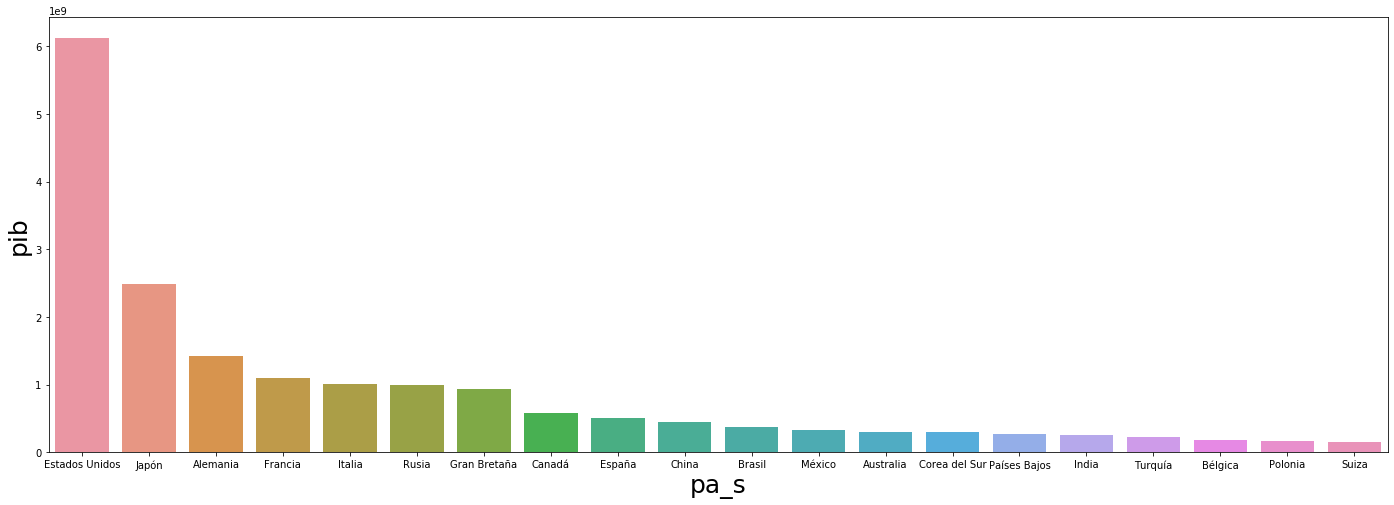

In [111]:
plt.figure(figsize=(24, 8)) #seteamos el tamaño del gráfico
plt.rcParams["axes.labelsize"] = 25
sns.barplot(dfPibHigher20['pa_s'],dfPibHigher20['pib'] )

7. Representa mediante un swarmplot la tasa de natalidad por región y añade como tercera variable categórica el clima. ¿Tiene sentido el gráfico obtenido en relación a los datos? Comenta el resultado.

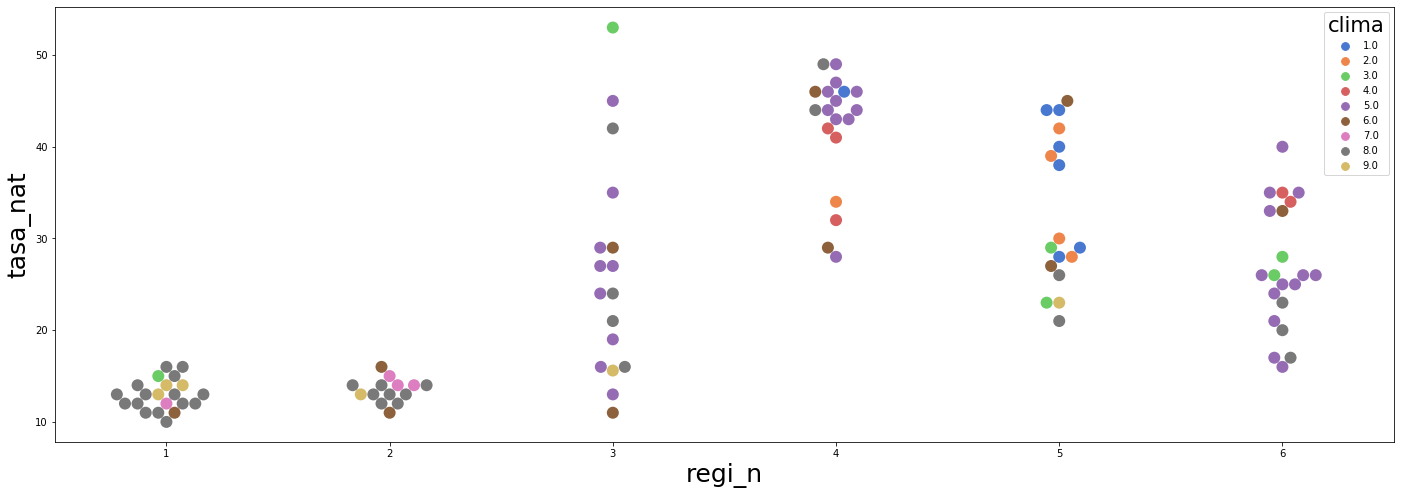

In [112]:
plt.figure(figsize=(24, 8))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['tasa_nat'], x=df['regi_n'], hue=df['clima'] , size=12, palette="muted" )

Anteriormente hemos analizado la media de la variable 'tasa_nat' respecto al clima, observando que los clima 1, 4, 2, 5 y 6 tiene la mayor tasa media de natalidad, en ese orden.

El el grafico si observamos donde se situan los climas antes mencionados, podemos observar que la mayoria se situan en valores altos de 'tasa_nat, por lo que cuadra con los valores medios antes observados.

8. Representa mediante un boxplot la tasa de natalidad por clima. Comenta los resultados.

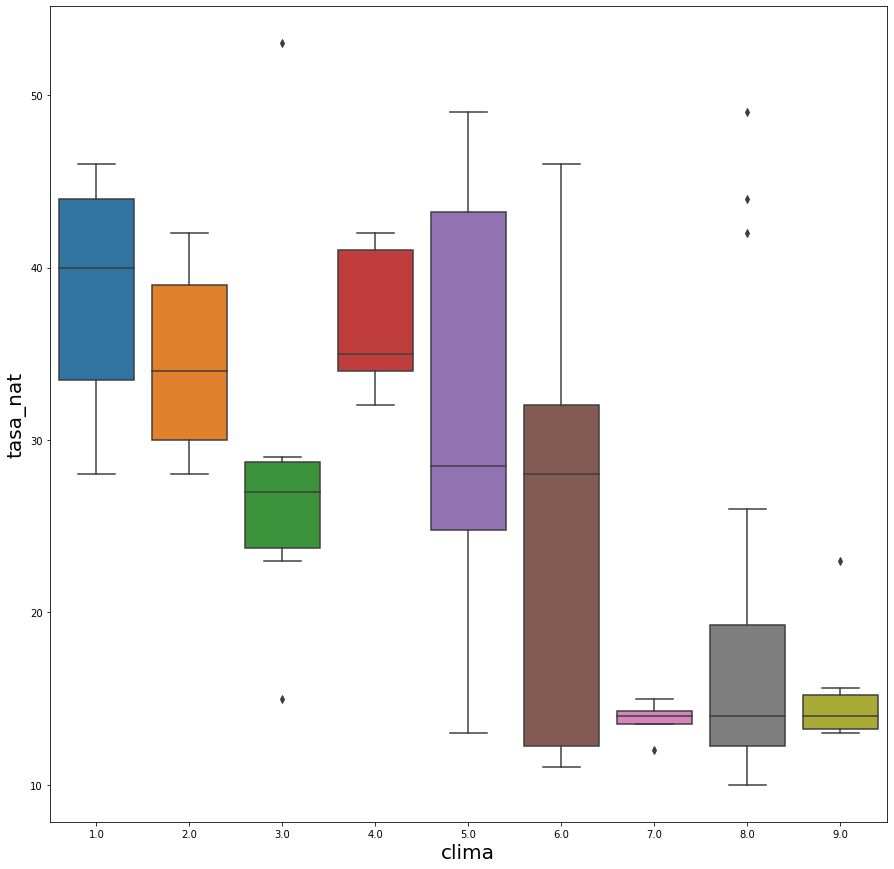

In [113]:
plt.figure(figsize=(15, 15))
plt.rcParams["axes.labelsize"] = 20
ax = sns.boxplot(x=df['clima'], y=df['tasa_nat'])

Como en el analisis de la tasa media hemos observado los climas 1, 4, 2, 5 y 6 como los climas con mayor tasa media de natalidad, si analizamos el grafico de la tasa de natalidad por clima, podemos ver más claro el motivo.

Los climas 1, 4, 2 y 5 vemos claramente que la altura de la caja que equivale al 50% de las muestras se situa en valores altos del grafico.

9. Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

In [114]:
plt.figure(figsize=(15, 15))

#Para poder hacer un primer análisis de nuestros datos podemos hacer un scatter de todas las columnas
#respecto al resto y ver la distribución que siguen.
#-> si queremos ver el resultado hay que descomentar la siguiente línea.

#ax = sns.pairplot(dfPib)

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

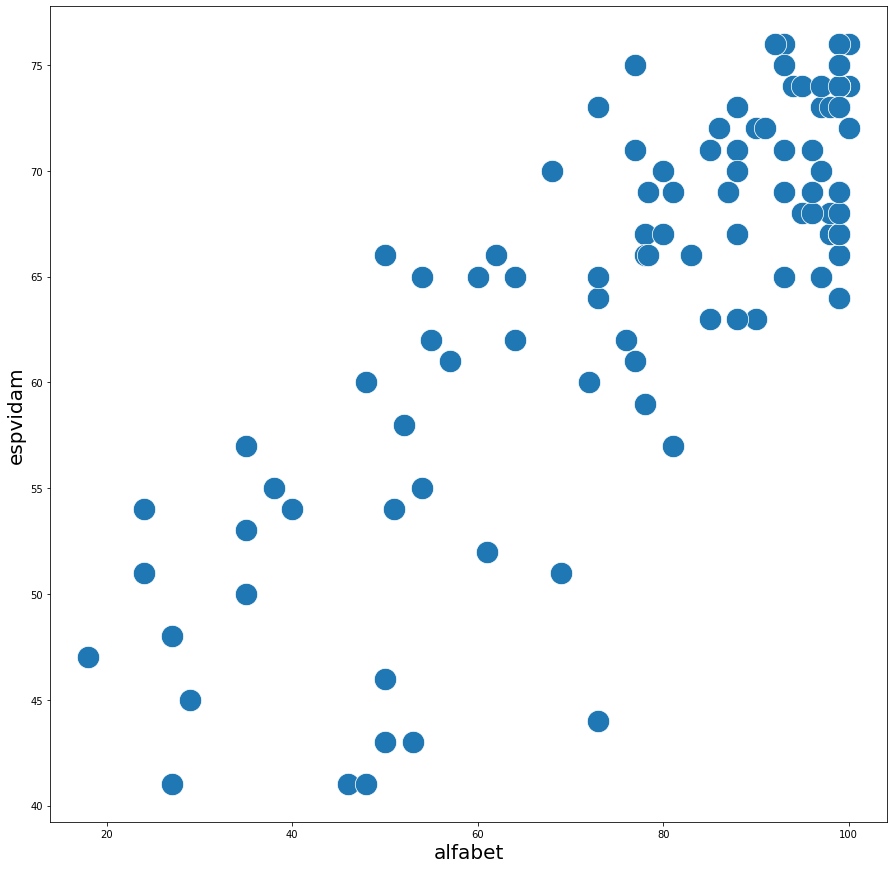

In [115]:
#Aunque podemos hacer un scatter por pares de columnas
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(df['alfabet'],  df['espvidam'],s=500) 

Como podemos ver, esta manera de mostrar datos nos hace ver de manera sencilla si dos columnas del dataset tienen relación entre sí. 

En este caso hemos elegido las columnas de esperanza de vida de las mujeres y la alfabetización de la población. Se puede apreciar que la esperanza de vida de los hombres aumenta conforme la proporción de alfabetización de la población aumenta. 

Esto nos lleva a pensar que debería pasar lo mismo con la esperanza de vida de las mujeres, ya que a priori no hay ninguna hipótesis para plantear lo contrario.

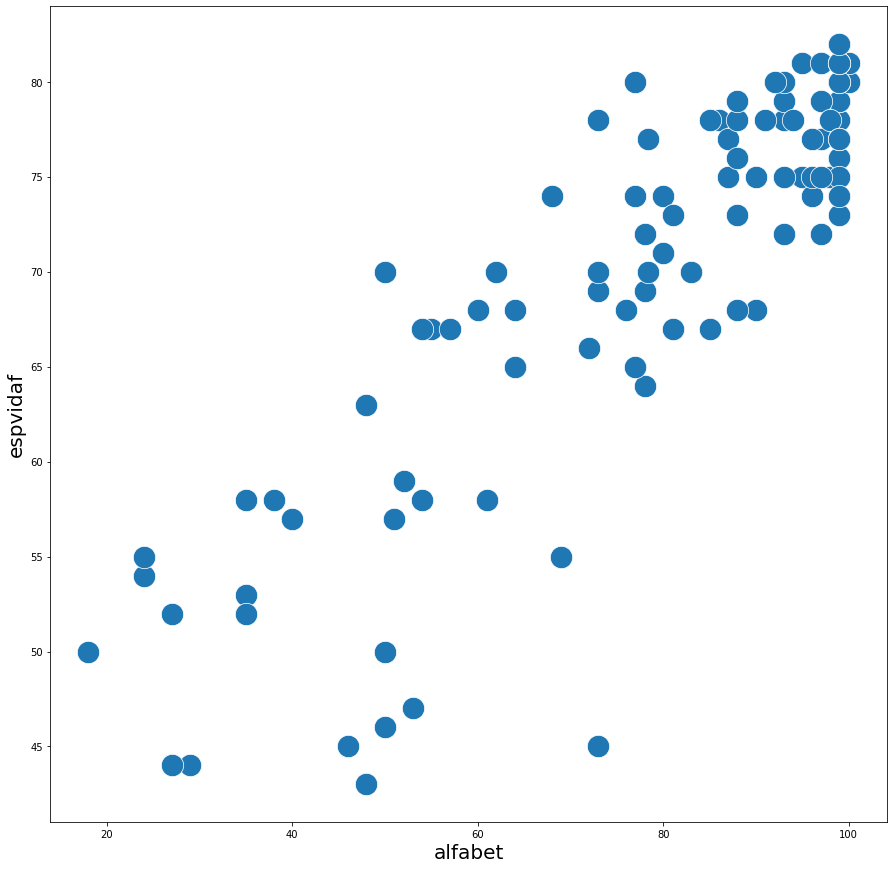

In [116]:
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(df['alfabet'],  df['espvidaf'],s=500)  

Como es lógico, sigue una distribución similar a la anterior. 

Lo siguiente que nos interesa saber es si el pib per cápita es una variable de interés en nuestro estudio. Para ello cogemos la columna del pib per cápita y, obteniendo el valor mínimo y máximo, dividimos en 5 partes iguales el intervalo de valores del pib.(Esto es debido a la falta de conocimiento del tema, ya que no sabemos si dividir entre 5 de manera equidistante es lo más correcto.) Para los valores altos daremos el valor 1 e iremos bajando hasta que para los valores de pib per cápita más bajo, éste valdrá 5. 

[  122.   4792.4  9462.8 14133.2 18803.6]
109
[5, 5, 2, 4, 5, 4, 2, 2, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 5, 5, 2, 3, 1, 4, 4, 5, 2, 1, 5, 5, 5, 2, 4, 5, 5, 5, 2, 4, 5, 5, 5, 5, 3, 2, 3, 2, 1, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 2, 2, 4, 2, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 2, 5, 5, 5, 2, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


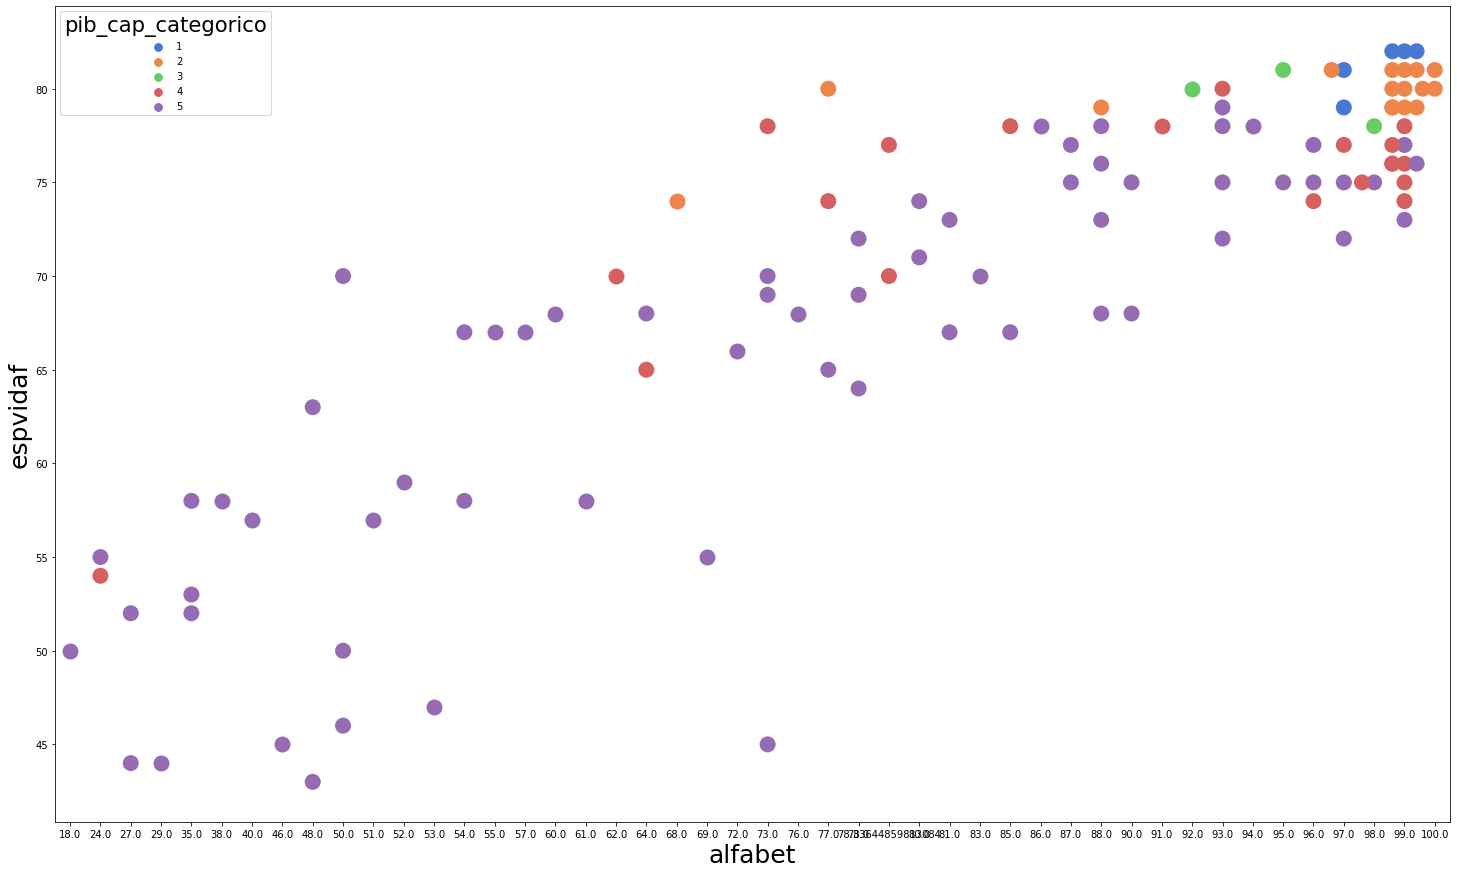

In [117]:
min_pib= min(df['pib_cap'])
max_pib= max(df['pib_cap'])
range_pib = np.linspace(min_pib, max_pib, 5, endpoint=False)
    
print(range_pib)
print(len(df))

pib_cap_categorico = []
for i in range(0, len(df)):
    pib_cap = df['pib_cap'][i]
    if pib_cap > range_pib[4]:
        valor = 1
    elif pib_cap > range_pib[3]:
        valor = 2
    elif pib_cap > range_pib[2]:
        valor = 3
    elif pib_cap > range_pib[1]:
        valor = 4
    elif pib_cap > range_pib[0]:
        valor = 5
        
    pib_cap_categorico.append(valor)
    
print(pib_cap_categorico)
    
df['pib_cap_categorico'] = pib_cap_categorico


plt.figure(figsize=(25,15))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['espvidaf'], x=df['alfabet'], hue=df['pib_cap_categorico'] , size=16, palette="muted" )


Si hacemos lo mismo para la esperanza de vida masculina:

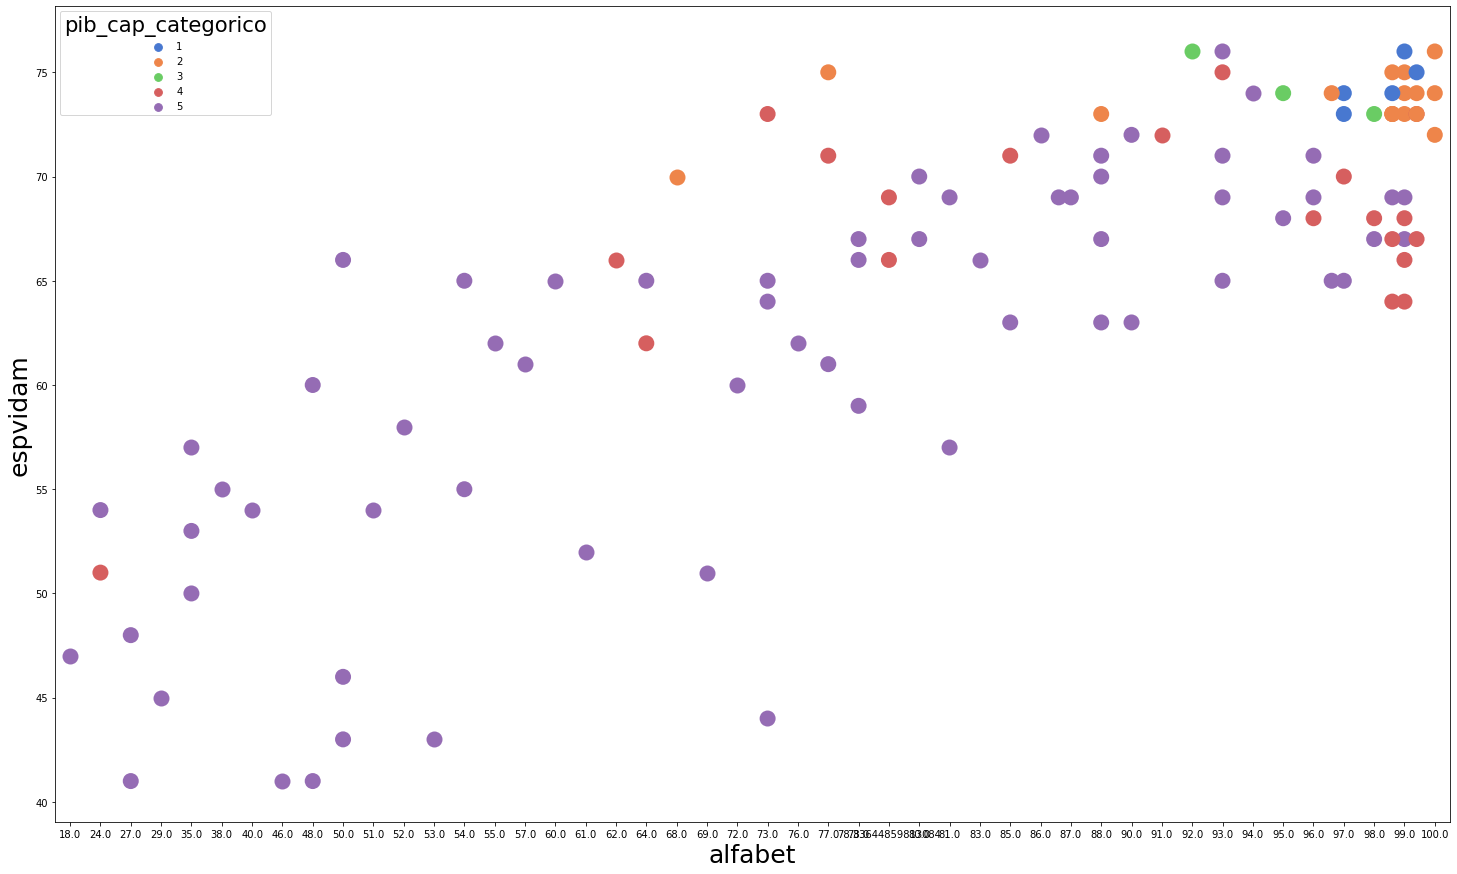

In [118]:
plt.figure(figsize=(25,15))
plt.rcParams["axes.labelsize"] = 25
ax = sns.swarmplot(y=df['espvidam'], x=df['alfabet'], hue=df['pib_cap_categorico'] , size=16, palette="muted" )

Vamos a analizar los casos. Podemos ver que un pib per capita alto coincide siempre (exceptuando dos casos de color naranja a mitad de tabla) con un porcentaje de alfabetización muy alto de la población y ésta nos está dando una esperanza de vida alta siempre (puntos azules, naranjas y verdes).

Si nos fijamos en los puntos rojos, pero sobre todos los morados, vemos que ahí se distribuye el pib per cápita de la mayoría de los países, lo que nos indica que no hemos elegido de manera correcta las divisiones en el pib per cápita debido a nuestra falta de conocimiento de lo que estamos estudiando. Pero si nos basamos en las divisiones elegidas, podemos decir que el quinto valor del pib per cápita aúna un gran conjunto de países y podemos ver que las opciones son múltiples. Es decir, pertenecer a un país con este pib per cápita no te garantiza un índice de alfabetización alto y por ello tampoco se puede garantizar una esperanza de vida alta (en hombres y mujeres), aunque hay casos en los que se da.